In [ ]:
# -----------------------------------------------------------
# sentiment analysis model 
# -----------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

In [ ]:
!pip install textstat

In [ ]:
import textstat

In [ ]:
text=pd.read_csv('../content/drive/My Drive/data.csv')
text.shape

(2000, 10)

In [ ]:
text.head()

title  ...                                                url
0   HONEST M31s. HONEST PERFORMANCE. HONEST PRICE.  ...  https://www.amazon.in/Test-Exclusive-712/produ...
1                             Jack of all trades!!  ...  https://www.amazon.in/Test-Exclusive-712/produ...
2  The phone got dead just after the initial setup  ...  https://www.amazon.in/Test-Exclusive-712/produ...
3                        Disappointed completely 😑  ...  https://www.amazon.in/Test-Exclusive-712/produ...
4                     Screen blacked out in 2 days  ...  https://www.amazon.in/Test-Exclusive-712/produ...

[5 rows x 10 columns]

In [ ]:
# select required features for analysis from the 21 given columns.
text.columns

Index(['title', 'content', 'date', 'variant', 'images', 'verified', 'author',
       'rating', 'product', 'url'],
      dtype='object')

In [ ]:
# select the the 5 key columns, title of the review, review content, user was verifies or not, and product name
textdata = text[['title','content','verified','rating','product']]
textdata.head()

title  ...                                            product
0   HONEST M31s. HONEST PERFORMANCE. HONEST PRICE.  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
1                             Jack of all trades!!  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
2  The phone got dead just after the initial setup  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
3                        Disappointed completely 😑  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
4                     Screen blacked out in 2 days  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...

[5 rows x 5 columns]

In [ ]:
# drop null values
textdata.dropna(inplace=True)
textdata.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


title       0
content     0
verified    0
rating      0
product     0
dtype: int64

In [ ]:
textcopy=textdata.copy()

In [ ]:
# filter products based on number of reviews

textdata=textdata.groupby(['product']).filter(lambda x: len(x)>10).reset_index(drop=True)
print('Number of products matching the criteria is ',len(textdata['product'].unique()))

Number of products matching the criteria is  10


In [ ]:
# convert datatype boolean to int
textdata['verified']=textdata['verified'].astype(int)

In [ ]:
# cleaning text data
# there are 10 unique product names
# remove unwanted characters from the names.

textdata['product'].unique()
textdata['product']=textdata['product'].apply(lambda x: x.split(',,,')[0])
textdata.head()

title  ...                                            product
0   HONEST M31s. HONEST PERFORMANCE. HONEST PRICE.  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
1                             Jack of all trades!!  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
2  The phone got dead just after the initial setup  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
3                        Disappointed completely 😑  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
4                     Screen blacked out in 2 days  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...

[5 rows x 5 columns]

In [ ]:
# explore and clean the review text

for text in enumerate(textdata['content'][20:30]):
  print('Review:\n',text)

Review:
 (0, "Honest review for a Honest Samsung phone. I am writing this review after using M31s for more than half month. And my verdict based on truly improved Samsung M series with my experience & tested after usage only. BUILD QUALITY. Superior, as it matches any S series flagship premium in classy look, strong built for this budget amount. My hand is small but still I found 6.5 inches display is good to handle as it is well managed for one hand use also. DISPLAY & FINGERPRINT. With Samsung SuperAmoled display you can truly trust the amazing view angle. Now in M31s feature of Widevine L Certification you can enjoy all those global Dolby theatre experience. I found it reliable for my 1920p to 4k level of movie watching without any distraction due to Infinite O display which gives Full Screen Ratio. Fingerprint on side is much faster than I expected. It doesn't takes a second also to open. Even FaceUnlock is faster. BATTERY. Main benefit of this midrange M series is it's maasive 600

# **Data Preprocessing**

In [ ]:
# while developing NLP models capital and lowercase letters are treated differently so its required to convert all words to lowercase, as few words are in capitals in the review text.

textdata['title']=textdata['title'].apply(lambda x: x.lower())
textdata['content']=textdata['content'].apply(lambda x: x.lower())

In [ ]:
# eliminate digits in the text using regular expressions

textdata['title']=textdata['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
textdata['content']=textdata['content'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
# eliminate punctuations

textdata['title']=textdata['title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
textdata['content']=textdata['content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here, with the help of NLTK Library, we will perform the following:

1. Tokenization
2. Lemmatization
3. Stemming
4. Stop Words removal
5. Rejoining 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

**Tokenization**

---


I will use word_tokenize method from NLTK to split the text into individual words (and you will see that punctuation is also produced as separate ‘words’). I will apply the word_tokenize to all records, making a new column in our textdata DataFrame. Each entry will be a list of words. Here I will also strip out non alphanumeric words/characters (such as numbers and punctuation) using .isalpha (you could use .isalnum if you wanted to keep in numbers as well).

In [ ]:
def identify_tokens_title(row):
    title = row['title']
    tokens = nltk.word_tokenize(title)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

def identify_tokens_content(row):
    content = row['content']
    tokens = nltk.word_tokenize(content)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words


textdata['title'] = textdata.apply(identify_tokens_title, axis=1)
textdata['content'] = textdata.apply(identify_tokens_content, axis=1)
textdata.head()

title  ...                                            product
0       [honest, honest, performance, honest, price]  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
1                            [jack, of, all, trades]  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
2  [the, phone, got, dead, just, after, the, init...  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
3                         [disappointed, completely]  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
4                   [screen, blacked, out, in, days]  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...

[5 rows x 5 columns]

**Lemmatization**

---

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. It is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma_list_title(row):
  my_list = row['title']
  lemmatized_list = [lemmatizer.lemmatize(title) for title in my_list]
  return (lemmatized_list)

def lemma_list_content(row):
  my_list = row['content']
  lemmatized_list = [lemmatizer.lemmatize(content) for content in my_list]
  return (lemmatized_list)


textdata['title'] = textdata.apply(lemma_list_title, axis=1)
textdata['content'] = textdata.apply(lemma_list_content, axis=1)

**Stemming**

---


Stemming reduces related words to a common stem. It is an optional process step, and it it is useful to test accuracy with and without stemming.

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list_title(row):
    my_list = row['title']
    stemmed_list = [stemming.stem(title) for title in my_list]
    return (stemmed_list)


def stem_list_content(row):
    my_list = row['content']
    stemmed_list = [stemming.stem(content) for content in my_list]
    return (stemmed_list)

textdata['title'] = textdata.apply(stem_list_title, axis=1)
textdata['content'] = textdata.apply(stem_list_content, axis=1)


**Removing stop words**

---


‘Stop words’ are commonly used words that are unlikely to have any benefit in natural language processing. These includes words such as ‘a’, ‘the’, ‘is’.

As before I will define a function and apply it to our DataFrame.

I will create a set of words that we will call ‘stops’ (using a set helps to speed up removing stop words).



In [ ]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops_title(row):
    my_list = row['title']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)


def remove_stops_content(row):
    my_list = row['content']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)


textdata['title'] = textdata.apply(stem_list_title, axis=1)
textdata['content'] = textdata.apply(stem_list_content, axis=1)

In [ ]:
# re-joining the words back to form a sentence after pre-processing
def rejoin_words_title(row):
    my_list = row['title']
    joined_words = ( " ".join(my_list))
    return joined_words


def rejoin_words_content(row):
    my_list = row['content']
    joined_words = ( " ".join(my_list))
    return joined_words


textdata['title'] = textdata.apply(rejoin_words_title, axis=1)
textdata['content'] = textdata.apply(rejoin_words_content, axis=1)

In [ ]:
textdata

title  ...                                            product
0                    honest honest perform honest price  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
1                                     jack of all trade  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
2         the phone got dead just after the initi setup  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
3                                    disappoint complet  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
4                               screen black out in day  ...  Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...
...                                                 ...  ...                                                ...
1995                                               warn  ...  Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...
1996  first impress is awesom worth of amount money ...  ...  Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...
1997                                        star out of  ...  Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...
1998                                     all over phone  ...  Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...
1999  not satisfi with thi cost thi product is hang ...  ...  Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...

[2000 rows x 5 columns]

# **Data Exploration**
Now its time to explore the preprocessed and cleaned text reviews. Textual data can be explored using Word Clouds. These are visual representations of the frequency of different words present in text. Importance of words are represented by size of the word. Bigger size represents more frequently occuring words.

In [ ]:
textdataexp=textdata[['product','title','content']].groupby(by='product').agg(lambda x:' '.join(x))
textdataexp

title                                            content
product                                                                                                                                                 
Apple iPhone 11 Pro Max (64GB) - Midnight Green     beast phone of the year nice butteri smooth in...  the tripl camera on the iphon pro max now give...
Apple iPhone XR (64GB) - Black                      def a bad experi horribl experi with amazon no...  went with the iphon xr after over a month of c...
OnePlus 7T Pro (Haze Blue, 8GB RAM, Fluid AMOLE...  the best smartphon of the flagship king it a c...  a lengthi brutal honest review it worth the re...
OnePlus 8 5G (Glacial Green 6GB RAM+128GB Storage)  plea read befor buy great but alway with some ...  hell man im a oneplu fan till i buy thi mobile...
Oppo A52 (Twilight Black, 6GB RAM, 128GB Storag...  rang is higher then qualiti dont buy shandar l...  how could you think it can compet other brand ...
Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage)| 3 Mo...  dont buy thi mobil redmi hhoo chang mind aweso...  don t buy thi product imag qualiti is below av...
Redmi Note 9 Pro Max (Interstellar Black, 6GB R...  realli amaz phone no reason to buy redmi note ...  actual asusu best phone by redmiamaz phone des...
Samsung Galaxy M11 (Black, 4GB RAM, 64GB Storag...  just ok not up to the mark innov and creativ a...  in display line start come after use day i wan...
Samsung Galaxy M21 (Blue, 4GB RAM, 64GB Storage)    valu for money go for it  best budget phone in...  updat never give a chanc to regret go the icon...
Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128G...  honest honest perform honest price jack of all...  honest review for a honest samsung phone i am ...

In [ ]:
!pip install sorl-thumbnail==12.3

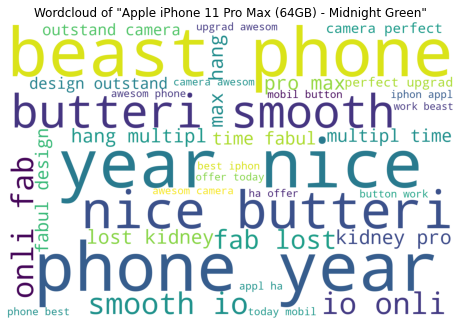

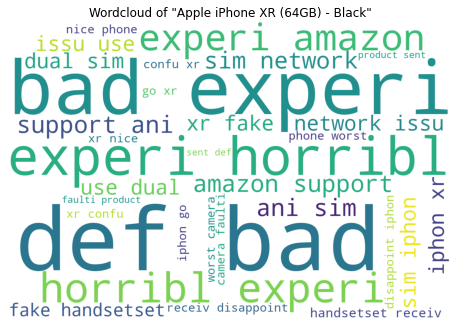

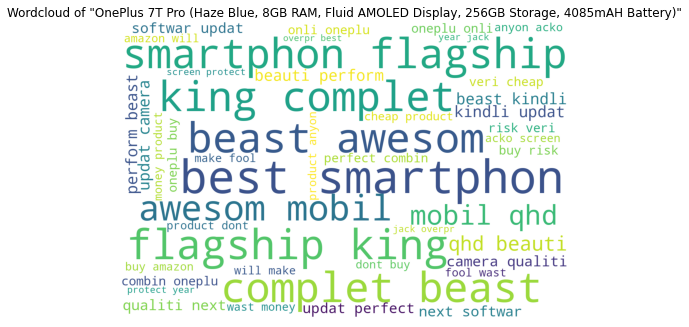

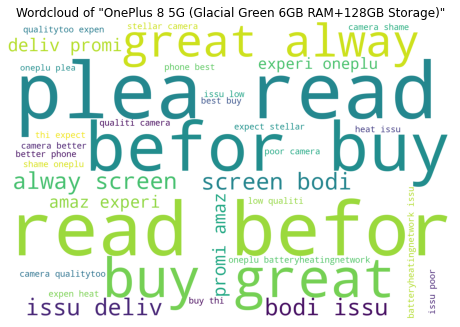

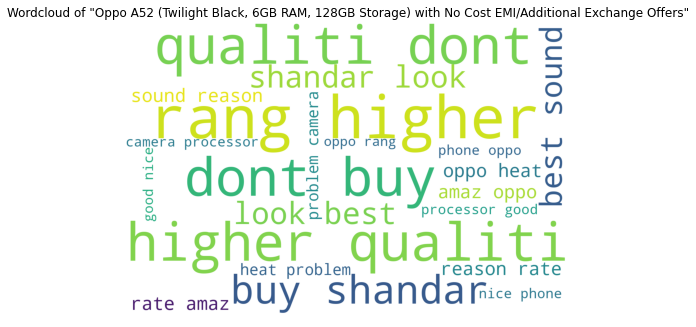

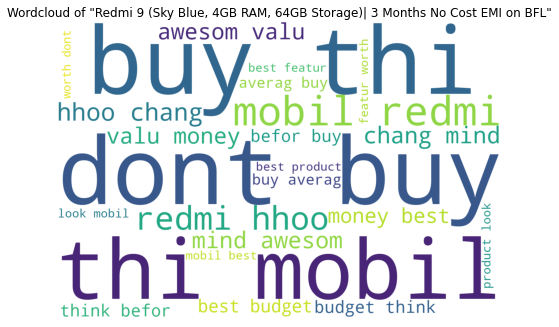

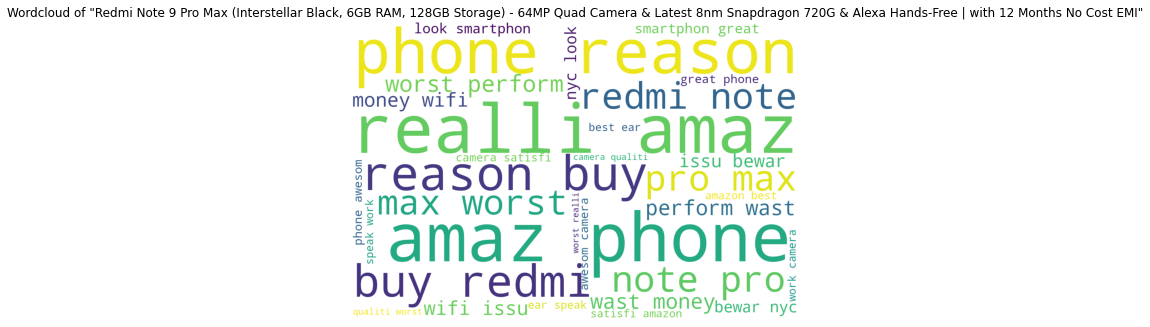

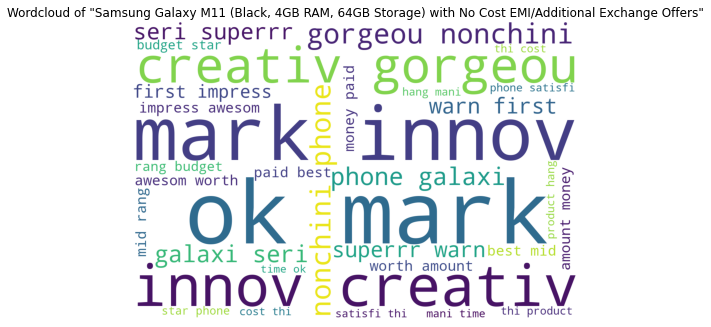

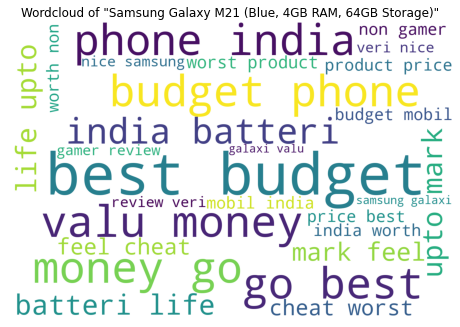

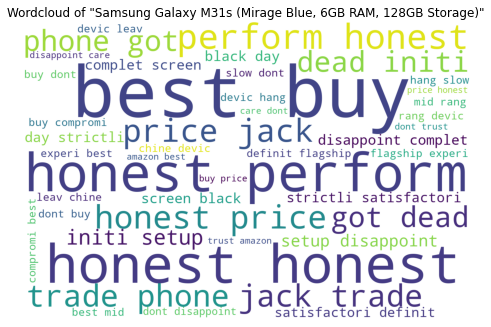

In [ ]:
from wordcloud import WordCloud 
import itertools
def wordcloud_draw(data,key):
    wordcloud = WordCloud(background_color="#ffffff",
                      width=1500,
                      height=1000
                     ).generate(data)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.title('Wordcloud of "{}"'.format(key))
    plt.axis('off')
    plt.show()

for index, value in zip(textdataexp.index, textdataexp['title']):
  wordcloud_draw(value,index)

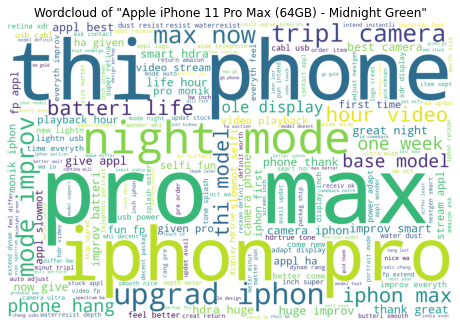

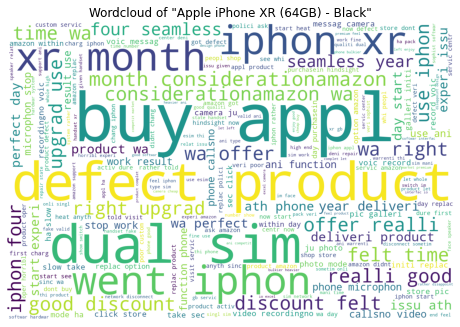

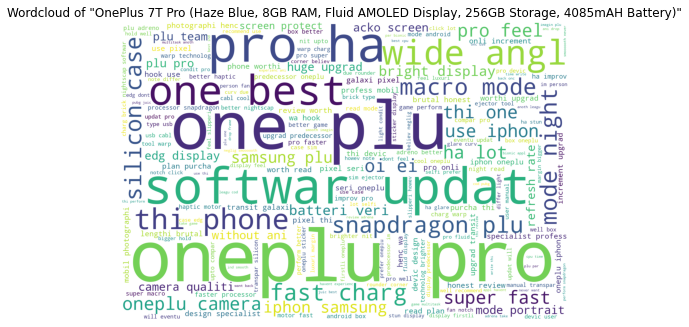

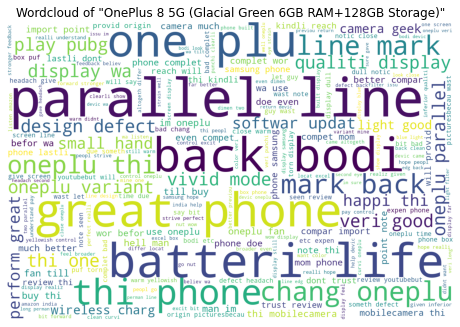

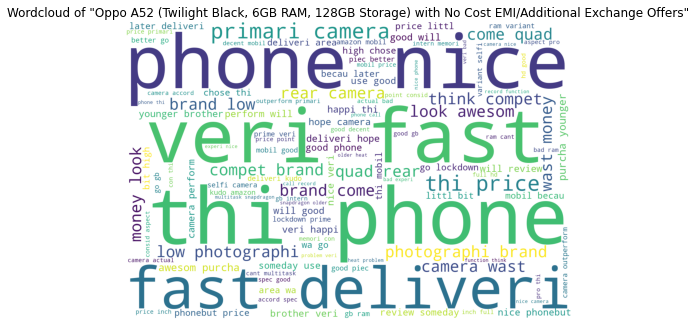

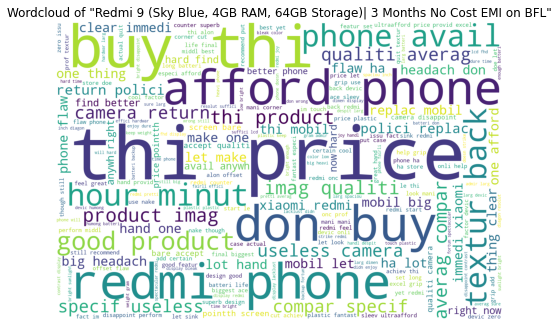

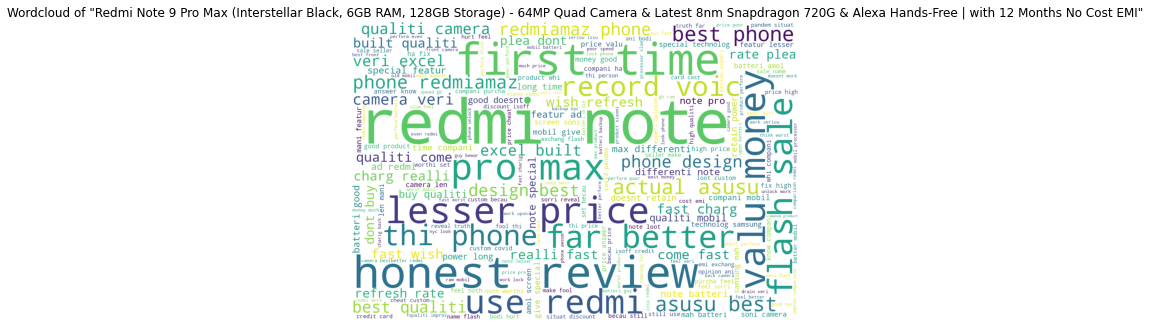

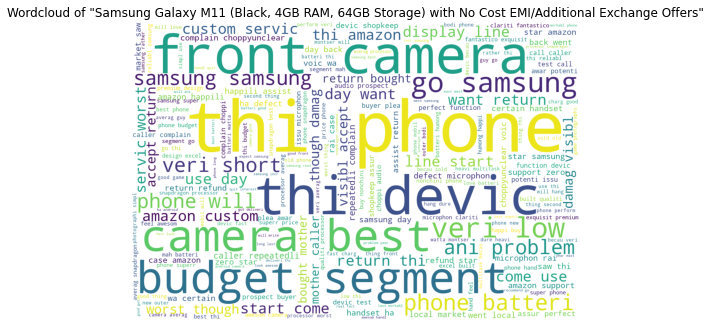

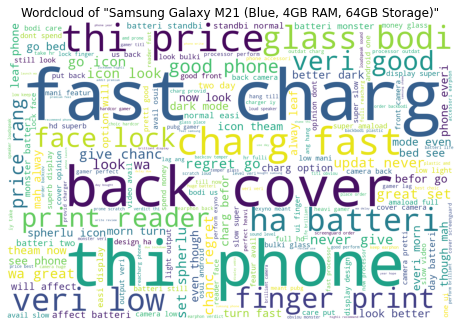

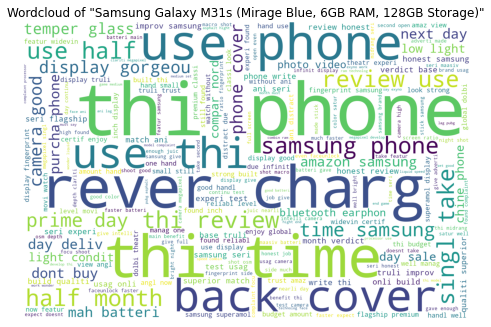

In [ ]:
from wordcloud import WordCloud 
import itertools
def wordcloud_draw(data,key):
    wordcloud = WordCloud(background_color="#ffffff",
                      width=1500,
                      height=1000
                     ).generate(data)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.title('Wordcloud of "{}"'.format(key))
    plt.axis('off')
    plt.show()

for index, value in zip(textdataexp.index, textdataexp['content']):
  wordcloud_draw(value,index)

In [ ]:
# Seprating the dependent variable and target variable

y = textdata['rating']
X = textdata.drop(['rating','product'],axis=1)
print(y.shape)
print(X.shape)

(2000,)
(2000, 3)


In [ ]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [ ]:
# Vectorise to tf-idf using TfidfVectorizer
# Lastly, preprocess the corpus:
# Create an instance of TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
title_vect = TfidfVectorizer()
content_vect = TfidfVectorizer()

title_train = title_vect.fit_transform(X_train['title'])
content_train = content_vect.fit_transform(X_train['content'])

title_test = title_vect.transform(X_test['title'])
content_test = content_vect.transform(X_test['content'])

In [ ]:
X_train['title'] = title_train.sum(axis=1)
X_train['content'] = content_train.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test['title'] = title_test.sum(axis=1)
X_test['content'] = content_test.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Is the dataset balanced?**

One important aspect to note before analyzing a sentiment classification dataset is the class distribution in the training data.


Text(0, 0.5, 'Ratings')

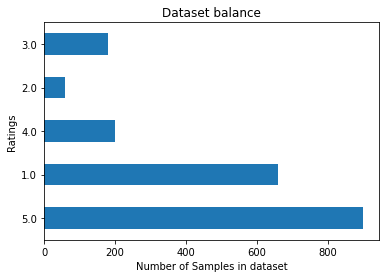

In [ ]:
# checking balance of the dataset
import matplotlib.pyplot as plt
ax = textdata['rating'].value_counts(sort=False).plot(kind='barh')
ax.set_title('Dataset balance')
ax.set_xlabel('Number of Samples in dataset')
ax.set_ylabel('Ratings')

# **Fine Grained Sentiment Analysis**
In most cases today, sentiment classifiers are used for binary classification (just positive or negative sentiment), and for good reason: fine-grained sentiment classification is a significantly more challenging task! The typical breakdown of fine-grained sentiment uses five discrete classes, as shown below. As one might imagine, models very easily err on either side of the strong/weak sentiment intensities thanks to the wonderful subtleties of human language.


---


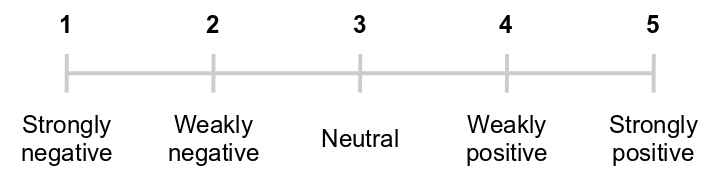

I’ll compare and discuss classification results using several well-known NLP libraries in Python. The methods described below fall under three broad categories:

**1.  Feature-based methods:**
*  Logistic Regression: Generalized linear model in Scikit-learn.
*  Support Vector Machine (SVM): Linear model in Scikit-learn with a stochastic gradient descent (SGD) optimizer for gradient loss.
*  Multinomial Naive bayes: Classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.

**2.   Rule-based methods:**
*  TextBlob: Simple rule-based API for sentiment analysis
*  VADER: Parsimonious rule-based model for sentiment analysis of social media text.

**3.  Embedding-based methods:**
*  FastText: An NLP library that uses highly efficient CPU-based *  representations of word embeddings for classification tasks.
*  Flair: A PyTorch-based framework for NLP tasks such as sequence tagging and classification.


**Feature based methods**

In this section, I’ll go through the training, sentiment scoring and model evaluation for each feature based method.

In [ ]:
# try few classification algorithms first
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB as MNB
classifier_dict={'Logistic Regression': LR(),'Support Vector Classification':SVC(),'Multinomial Naive Bayes':MNB()}
for x,y in classifier_dict.items():
  classifier = y
  classifier.fit(X_train, y_train)
  print(x)
  y_pred = classifier.predict(X_test)
  y_pred_tr = classifier.predict(X_train)
  print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))
  from sklearn.metrics import classification_report
  print("Classification Report(Train)")
  print(classification_report(y_train, y_pred_tr))
  print('Test accuracy', sum(y_test == y_pred)/len(y_test))
  print("Classification Report(Test)")
  print(classification_report(y_test, y_pred))
  print("\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Logistic Regression
Train accuracy 0.45357142857142857
Classification Report(Train)
              precision    recall  f1-score   support

         1.0       0.42      0.21      0.28       466
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00       118
         4.0       0.00      0.00      0.00       144
         5.0       0.46      0.85      0.60       631

    accuracy                           0.45      1400
   macro avg       0.18      0.21      0.18      1400
weighted avg       0.35      0.45      0.36      1400

Test accuracy 0.44166666666666665
Classification Report(Test)
              precision    recall  f1-score   support

         1.0       0.39      0.21      0.27       194
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00        62
         4.0       0.00      0.00      0.00        56
         5.0       0.45      0.84      0.59       269

    accuracy                           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

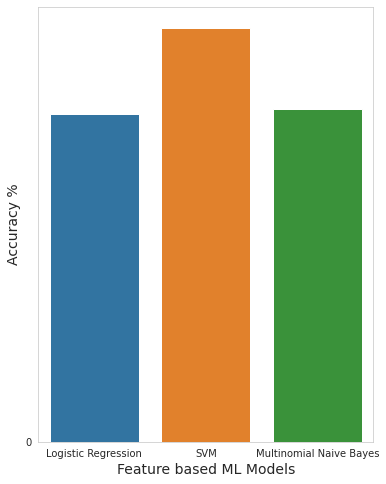

In [ ]:
# Both the models relatively provides better accuracy.
import seaborn as sns
methods = ["Logistic Regression","SVM","Multinomial Naive Bayes"]
accuracy = [0.44166666666666665,0.5583333333333333,0.4483333333333333]
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=14)
plt.xlabel("Feature based ML Models",fontsize=14)
sns.barplot(x=methods, y=accuracy)
plt.show()

# **Rule-based methods**
*   Text Blob: A sentiment lexicon can be used to discern objective facts from subjective opinions in text.Each word in the lexicon has scores for:

1. polarity: negative vs. positive (-1.0 => +1.0) 
2. subjectivity: objective vs. subjective (+0.0 => +1.0) 

In [ ]:
sample_reviews = textdata[['content', 'title','rating']]
pos_correct_title = 0
neg_correct_title = 0
samples=0
def detect_polarity(text):
  global pos_correct_title
  global neg_correct_title
  global samples
  x=TextBlob(text).sentiment.polarity
  samples+=1
  if x>0:
    pos_correct_title+=1
  if x<0:
    neg_correct_title+=1
  return x

def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

sample_reviews['subjectivity_title'] = sample_reviews['title'].apply(detect_subjectivity)
sample_reviews['polarity_title'] = sample_reviews['title'].apply(detect_polarity)
print("Positive accuracy for Title = {}% via {} samples".format(pos_correct_title/samples*100.0, samples))
print("Negative accuracy for Title = {}% via {} samples".format(neg_correct_title/samples*100.0, samples))
sample_reviews.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Positive accuracy for Title = 30.0% via 2000 samples
Negative accuracy for Title = 10.0% via 2000 samples


content  ... polarity_title
0  honest review for a honest samsung phone i am ...  ...       0.600000
1  order on prime day august am receiv the phone ...  ...       0.000000
2  thi is to share my horribl experi with amazon ...  ...      -0.200000
3  strongli recommend nowhi samsung make lot adve...  ...       0.000000
4  purcha the phone on veri first day deliv by am...  ...      -0.166667

[5 rows x 5 columns]

In [ ]:
pos_correct_content = 0
neg_correct_content = 0
samples=0
def detect_polarity(text):
  global pos_correct_content
  global neg_correct_content
  global samples
  x=TextBlob(text).sentiment.polarity
  samples+=1
  if x>0:
    pos_correct_content+=1
  if x<0:
    neg_correct_content+=1
  return x

def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

sample_reviews['subjectivity_content'] = sample_reviews['content'].apply(detect_subjectivity)
sample_reviews['polarity_content'] = sample_reviews['content'].apply(detect_polarity)
print("Positive accuracy for Content = {}% via {} samples".format(pos_correct_content/samples*100.0, samples))
print("Negative accuracy for Content = {}% via {} samples".format(neg_correct_content/samples*100.0, samples))
sample_reviews.head()

Positive accuracy for Content = 72.0% via 2000 samples
Negative accuracy for Content = 14.000000000000002% via 2000 samples


content  ... polarity_content
0  honest review for a honest samsung phone i am ...  ...         0.204149
1  order on prime day august am receiv the phone ...  ...         0.336607
2  thi is to share my horribl experi with amazon ...  ...        -0.200000
3  strongli recommend nowhi samsung make lot adve...  ...         0.151894
4  purcha the phone on veri first day deliv by am...  ...         0.020833

[5 rows x 7 columns]

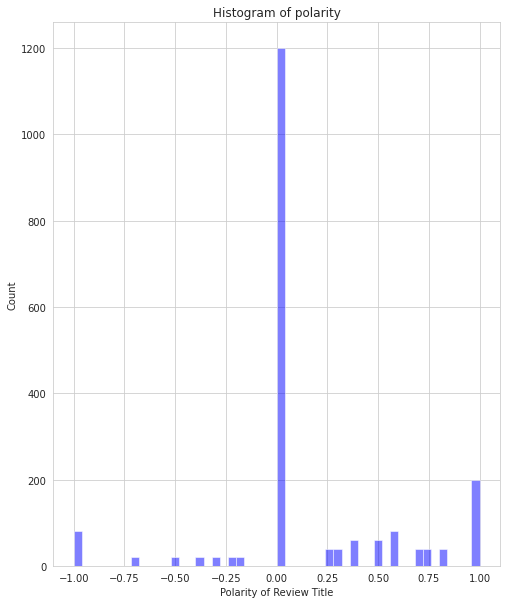

In [ ]:
import matplotlib.pyplot as plt
num_bins = 50
plt.figure(figsize=(8,10))
n, bins, patches = plt.hist(sample_reviews.polarity_title, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity of Review Title')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

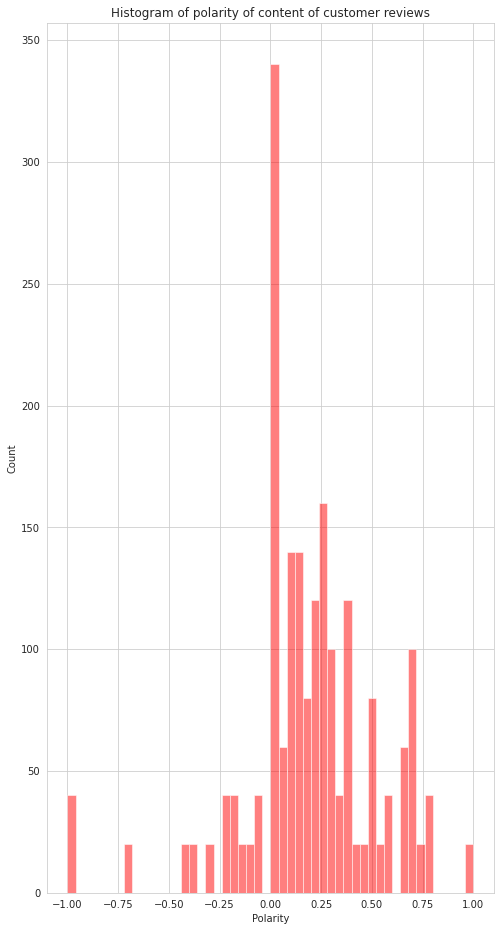

In [ ]:
num_bins = 50
plt.figure(figsize=(8,16))
n, bins, patches = plt.hist(sample_reviews.polarity_content, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity of content of customer reviews')
plt.show();

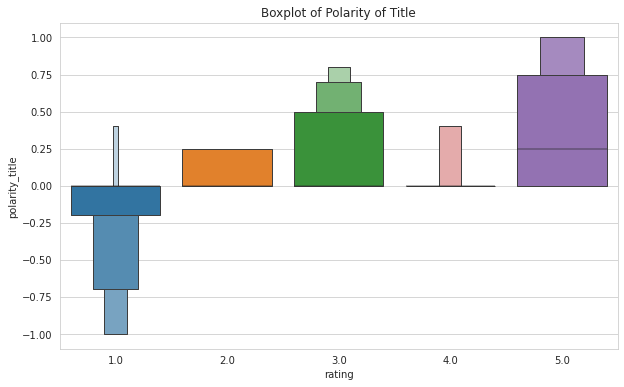

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxenplot(x='rating', y='polarity_title', data=sample_reviews)
plt.title('Boxplot of Polarity of Title')
plt.show();

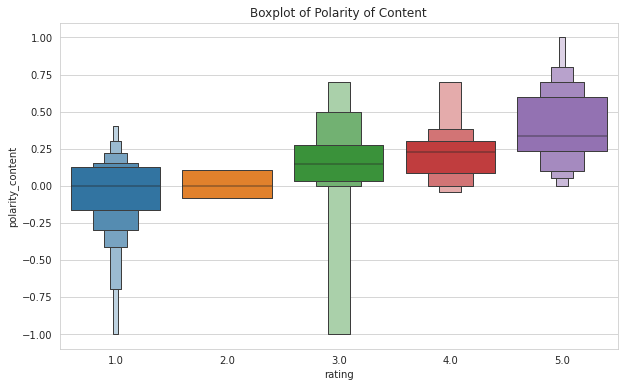

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxenplot(x='rating', y='polarity_content', data=sample_reviews)
plt.title('Boxplot of Polarity of Content')
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Title Subjectivity Score')

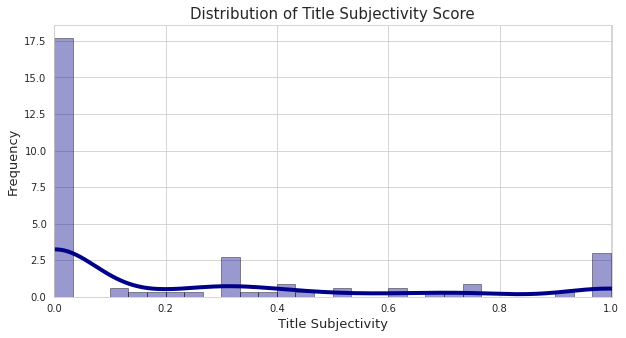

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(sample_reviews['subjectivity_title'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Title Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Title Subjectivity Score', fontsize=15)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Content Subjectivity Score')

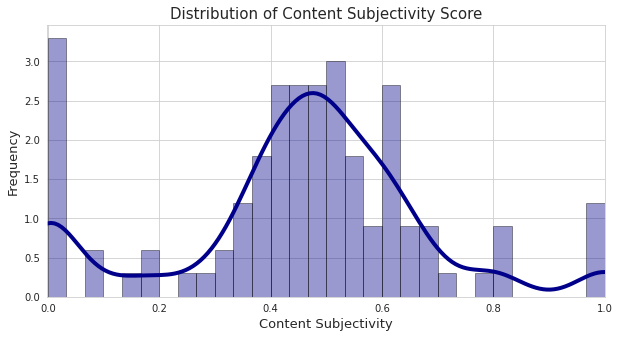

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(sample_reviews['subjectivity_content'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Content Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Content Subjectivity Score', fontsize=15)

**VADER Analysis:**

“Valence Aware Dictionary and sEntiment Reasoner” is another popular rule-based library for sentiment analysis. Like TextBlob, it uses a sentiment lexicon that contains intensity measures for each word based on human-annotated labels. A key difference however, is that VADER was designed with a focus on social media texts. This means that it puts a lot of emphasis on rules that capture the essence of text typically seen on social media — for example, short sentences with emojis, repetitive vocabulary and copious use of punctuation (such as exclamation marks).


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Add VADER metrics to dataframe
def detect_neg(text):
    sid= SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['neg']

def detect_neu(text):
    sid= SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['neu']

def detect_pos(text):
    sid= SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['pos']

def detect_compound(text):
    sid= SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

sample_reviews['neg_title'] = sample_reviews['title'].apply(detect_neg)
sample_reviews['neg_content'] = sample_reviews['content'].apply(detect_neg)
sample_reviews['neu_title'] = sample_reviews['title'].apply(detect_neu)
sample_reviews['neu_content'] = sample_reviews['content'].apply(detect_neu)
sample_reviews['pos_title'] = sample_reviews['title'].apply(detect_pos)
sample_reviews['pos_content'] = sample_reviews['content'].apply(detect_pos)
sample_reviews['compound_title'] = sample_reviews['title'].apply(detect_compound)
sample_reviews['compound_content'] = sample_reviews['content'].apply(detect_compound)
sample_reviews.head()

content  ... compound_content
0  honest review for a honest samsung phone i am ...  ...           0.9981
1  order on prime day august am receiv the phone ...  ...           0.9805
2  thi is to share my horribl experi with amazon ...  ...          -0.8360
3  strongli recommend nowhi samsung make lot adve...  ...          -0.8481
4  purcha the phone on veri first day deliv by am...  ...           0.4019

[5 rows x 15 columns]

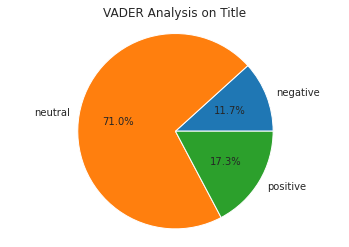

In [ ]:
labels = ['negative', 'neutral', 'positive']
sizes  = [sample_reviews['neg_title'].sum(axis = 0, skipna = True), sample_reviews['neu_title'].sum(axis = 0, skipna = True), sample_reviews['pos_title'].sum(axis = 0, skipna = True)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.title('VADER Analysis on Title')
plt.show()

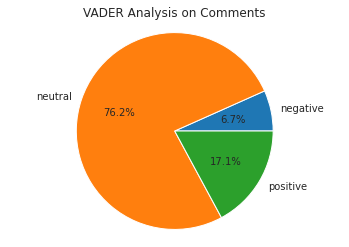

In [ ]:
labels = ['negative', 'neutral', 'positive']
sizes  = [sample_reviews['neg_content'].sum(axis = 0, skipna = True), sample_reviews['neu_content'].sum(axis = 0, skipna = True), sample_reviews['pos_content'].sum(axis = 0, skipna = True)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.title('VADER Analysis on Comments')
plt.show()